# SDB2 - Projeto de análise de dados de sinistros (PRF)

## Imports das bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore') # somente para ignorar os warnings

## Leitura dos Dataframes

In [2]:
# Carrega os dados
sinistros_2024 = pd.read_csv('../bronze/data/acidentes2024_todas_causas_tipos.csv', sep=';', encoding='latin1', quotechar='"', low_memory=False) # Separador ';' e encoding='latin1' para garantir parsing correto das colunas
sinistros_2025 = pd.read_csv('../bronze/data/acidentes2025_todas_causas_tipos.csv', sep=';', encoding='latin1', quotechar='"', low_memory=False) # low_memory=False evita warnings e quotechar='"' é o padrão

# Verifique se as colunas são idênticas para garantir consistência
if sinistros_2024.columns.tolist() != sinistros_2025.columns.tolist():
    print("Aviso: As colunas dos dois datasets não são idênticas.")

## União dos dados de sinistro de 2024 e 2025 em um único Dataset

In [3]:
df = pd.concat([sinistros_2024, sinistros_2025], ignore_index=True)

## Exibição do Dataset 

In [4]:
df

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,...,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
0,571772.0,1268971.0,2024-01-01,segunda-feira,00:05:00,RJ,101.0,"272,5",TANGUA,Sim,...,Masculino,0.0,0.0,0.0,1.0,-22.72936,-42.701125,SPRF-RJ,DEL02-RJ,UOP03-DEL02-RJ
1,571774.0,1268985.0,2024-01-01,segunda-feira,00:05:00,GO,153.0,"424,6",ANAPOLIS,Não,...,Feminino,1.0,0.0,0.0,0.0,-16.229185,-49.009797,SPRF-GO,DEL02-GO,UOP01-DEL02-GO
2,571774.0,1268985.0,2024-01-01,segunda-feira,00:05:00,GO,153.0,"424,6",ANAPOLIS,Sim,...,Feminino,1.0,0.0,0.0,0.0,-16.229185,-49.009797,SPRF-GO,DEL02-GO,UOP01-DEL02-GO
3,571777.0,1269020.0,2024-01-01,segunda-feira,01:45:00,ES,101.0,"264,1",SERRA,Sim,...,Masculino,1.0,0.0,0.0,0.0,-20.172928,-40.267364,SPRF-ES,DEL02-ES,UOP01-DEL02-ES
4,571778.0,1269028.0,2024-01-01,segunda-feira,00:45:00,SC,101.0,110,PENHA,Não,...,Masculino,1.0,0.0,0.0,0.0,-26.83477,-48.706151,SPRF-SC,DEL03-SC,UOP02-DEL03-SC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981785,719768.0,1606134.0,2025-07-14,segunda-feira,08:00:00,PB,230.0,"22,7",JOAO PESSOA,Sim,...,Masculino,0.0,1.0,0.0,0.0,"-7,1533967","-34,8547196",SPRF-PB,DEL01-PB,UOP01-DEL01-PB
981786,719768.0,1606149.0,2025-07-14,segunda-feira,08:00:00,PB,230.0,"22,7",JOAO PESSOA,Sim,...,Feminino,1.0,0.0,0.0,0.0,"-7,1533967","-34,8547196",SPRF-PB,DEL01-PB,UOP01-DEL01-PB
981787,719768.0,1606136.0,2025-07-14,segunda-feira,08:00:00,PB,230.0,"22,7",JOAO PESSOA,Sim,...,Masculino,0.0,1.0,0.0,0.0,"-7,1533967","-34,8547196",SPRF-PB,DEL01-PB,UOP01-DEL01-PB
981788,719768.0,1606135.0,2025-07-14,segunda-feira,08:00:00,PB,230.0,"22,7",JOAO PESSOA,Sim,...,Feminino,0.0,1.0,0.0,0.0,"-7,1533967","-34,8547196",SPRF-PB,DEL01-PB,UOP01-DEL01-PB


## Informações do Dataset 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981790 entries, 0 to 981789
Data columns (total 37 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      981790 non-null  float64
 1   pesid                   886609 non-null  float64
 2   data_inversa            981790 non-null  object 
 3   dia_semana              981790 non-null  object 
 4   horario                 981790 non-null  object 
 5   uf                      981790 non-null  object 
 6   br                      979475 non-null  float64
 7   km                      979475 non-null  object 
 8   municipio               981790 non-null  object 
 9   causa_principal         981790 non-null  object 
 10  causa_acidente          981790 non-null  object 
 11  ordem_tipo_acidente     981790 non-null  int64  
 12  tipo_acidente           981790 non-null  object 
 13  classificacao_acidente  981780 non-null  object 
 14  fase_dia            

## Descrição do DataSet

In [6]:
df.describe()

,id,pesid,br,ordem_tipo_acidente,id_veiculo,ano_fabricacao_veiculo,idade,ilesos,feridos_leves,feridos_graves,mortos
count,981790.000000,8.866090e+05,979475.000000,981790.000000,9.501750e+05,950175.000000,802985.000000,886609.000000,886609.000000,886609.000000,886609.000000
mean,641053.622870,1.433633e+06,217.170873,1.747731,1.146345e+06,1905.943215,40.418812,0.410944,0.341142,0.127303,0.054434
std,41511.700833,9.372559e+04,126.270337,0.996936,7.309660e+04,453.278324,45.936525,0.492005,0.474093,0.333312,0.226873
min,571772.000000,1.268971e+06,10.000000,1.000000,1.018215e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,606103.000000,1.353201e+06,116.000000,1.000000,1.083868e+06,2008.000000,27.000000,0.000000,0.000000,0.000000,0.000000
50%,638849.000000,1.433999e+06,163.000000,1.000000,1.147513e+06,2014.000000,38.000000,0.000000,0.000000,0.000000,0.000000
75%,671308.000000,1.515071e+06,324.000000,2.000000,1.209102e+06,2020.000000,49.000000,1.000000,1.000000,0.000000,0.000000
max,719768.000000,1.606149e+06,495.000000,14.000000,1.282059e+06,2025.000000,2024.000000,1.000000,1.000000,1.000000,1.000000


# Visualização do DataSet inicial

## Quantidade de sinistros por UF

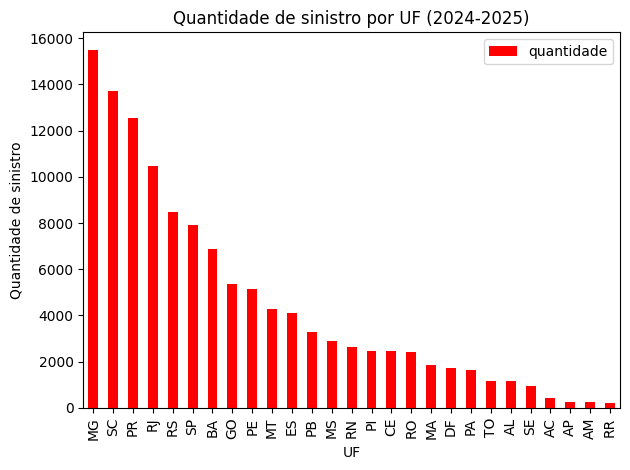

In [7]:
# Agrupa por UF, conta IDs únicos de sinistro e mostra em gráfico de barras ordenado
top_uf = df.groupby('uf')['id'].nunique().reset_index()
top_uf.columns = ['uf', 'quantidade']
top_uf.set_index('uf', inplace=True)
top_uf = top_uf.sort_values(by='quantidade', ascending=False)

top_uf.plot(kind='bar', color='red')
plt.title('Quantidade de sinistro por UF (2024-2025)')
plt.ylabel('Quantidade de sinistro')
plt.xlabel('UF')
plt.tight_layout()
plt.show()

## Quantidade de sinistros pelo período

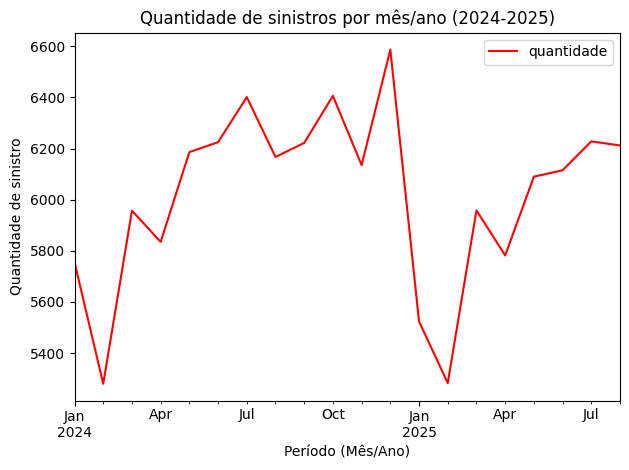

In [8]:
# Converte a coluna 'data_inversa' para datetime (formato já é YYYY-MM-DD), erros viram NaT
df['data_inversa_dt'] = pd.to_datetime(df['data_inversa'], format='%Y-%m-%d', errors='coerce')

# Agrupa por mês/ano, conta IDs únicos de sinistros e mostra em gráfico de linha temporal
top_mes = df.groupby(df['data_inversa_dt'].dt.to_period("M"))['id'].nunique().reset_index()
top_mes.columns = ['mes_ano', 'quantidade']
top_mes.set_index('mes_ano', inplace=True)
top_mes = top_mes.sort_index()

top_mes.plot(kind='line', color='red')
plt.title('Quantidade de sinistros por mês/ano (2024-2025)')
plt.ylabel('Quantidade de sinistro')
plt.xlabel('Período (Mês/Ano)')
plt.tight_layout()
plt.show()

## Top 10 Tipos de sinistros

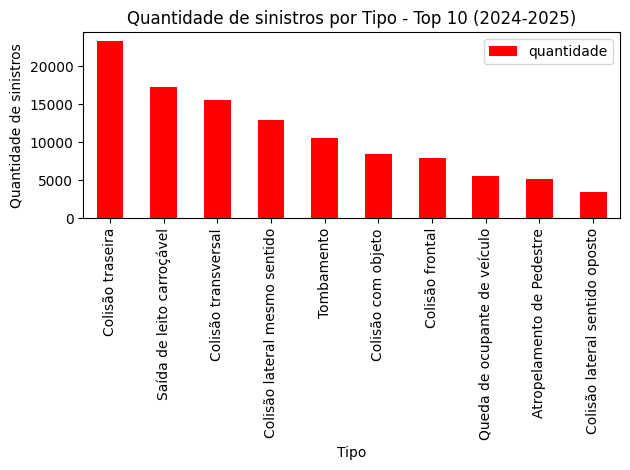

In [9]:
# Agrupa pelo Tipo primário, conta IDs únicos de sinistro e mostra em gráfico de barras ordenado
tipo_principal = df['ordem_tipo_acidente'] == 1
top_tipo = df[tipo_principal].groupby('tipo_acidente')['id'].nunique().reset_index()
top_tipo.columns = ['tipo_acidente', 'quantidade']
top_tipo.set_index('tipo_acidente', inplace=True)
top_tipo = top_tipo.sort_values(by='quantidade', ascending=False)
top_tipo = top_tipo.head(10)

top_tipo.plot(kind='bar', color='red')
plt.title('Quantidade de sinistros por Tipo - Top 10 (2024-2025)')
plt.ylabel('Quantidade de sinistros')
plt.xlabel('Tipo')
plt.tight_layout()
plt.show()

## Top 10 Causas de sinistros

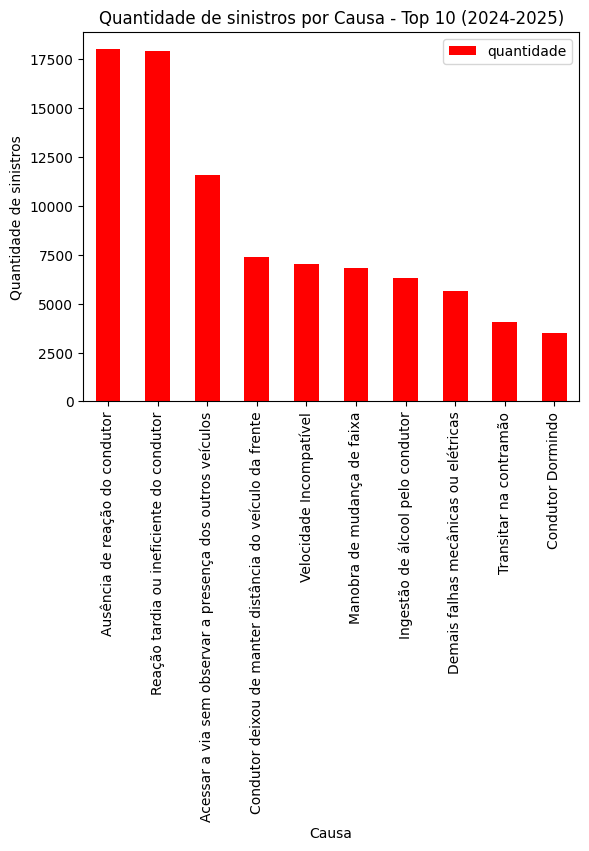

In [10]:
# Agrupa pela Causa principal, conta IDs únicos de sinistro e mostra em gráfico de barras ordenado
causa_principal = df['causa_principal'] == "Sim"
top_causa = df[causa_principal].groupby('causa_acidente')['id'].nunique().reset_index()
top_causa.columns = ['causa_acidente', 'quantidade']
top_causa.set_index('causa_acidente', inplace=True)
top_causa = top_causa.sort_values(by='quantidade', ascending=False)
top_causa = top_causa.head(10)

top_causa.plot(kind='bar', color='red')
plt.title('Quantidade de sinistros por Causa - Top 10 (2024-2025)')
plt.ylabel('Quantidade de sinistros')
plt.xlabel('Causa')
plt.tight_layout()
plt.show()

## Quantidade de envolvidos pelo Sexo

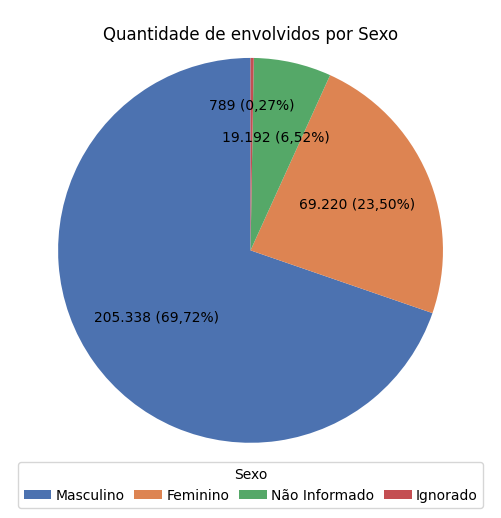

In [11]:
# Converte a coluna 'sexo' para string
df['sexo'] = df['sexo'].astype(str)

# Remove linhas com 'pesid' nulo (sem pessoa envolvida)
df_envolvidos = df[df['pesid'].notna()]

# Agrupa pelo Sexo, conta IDs únicos de pessoas e mostra em gráfico de pizza ordenado
df_pessoas = df_envolvidos.groupby('sexo')['pesid'].nunique().reset_index()
df_pessoas.columns = ['sexo', 'quantidade']
df_pessoas = df_pessoas.sort_values(by='quantidade', ascending=False)
df_pessoas.set_index('sexo', inplace=True)

# Calcula o total para as porcentagens
total_pessoas = df_pessoas['quantidade'].sum()

# Função para formatar os rótulos com quantidade absoluta e porcentagem
def format_label(pct):
    absolute = int(round(pct/100.*total_pessoas))
    return f"{absolute:,} ({pct:.2f}%)".replace(",", "X").replace(".", ",").replace("X", ".")

plt.figure(figsize=(5.5, 5.5))
wedges, texts, autotexts = plt.pie(
    df_pessoas['quantidade'],
    autopct=format_label,
    pctdistance=0.60,
    colors=sns.color_palette('deep')[0:len(df_pessoas.index)],
    textprops={'color': "black", 'fontsize': 10},
    startangle=90
)

# Itera sobre os rótulos de porcentagem (autotexts)
for i, (wedge, autotext) in enumerate(zip(wedges, autotexts)):
    x = autotext.get_position()[0]
    y = autotext.get_position()[1]
    # Se a porcentagem for menor que um limite
    if df_pessoas['quantidade'][i] / total_pessoas < 0.01:
        autotext.set_position((x * 1.25, y * 1.25))

plt.title('Quantidade de envolvidos por Sexo', y=0.92)

# Adiciona a legenda fora do gráfico
plt.legend(
    wedges,
    df_pessoas.index,
    title="Sexo",
    loc="lower center",
    bbox_to_anchor=(0.5, -0.05),
    ncol=len(df_pessoas.index),
    handletextpad=0.3,
    columnspacing=0.7
)

plt.tight_layout()
plt.show()

## Quantidade de envolvidos pela Faixa Etária

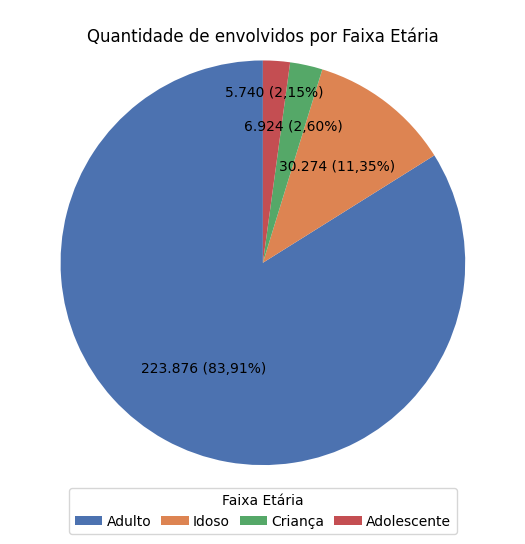

In [12]:
# Função para classificar idades em faixas etárias (Conforme ECA)
def idade_to_classe(idade):
    if pd.isna(idade):
        return pd.NA
    idade = int(idade)
    if idade < 0:
        return pd.NA
    if idade <= 11:
        return 'Criança'
    if 12 <= idade <= 17:
        return 'Adolescente'
    if 18 <= idade <= 59:
        return 'Adulto'
    return 'Idoso'

# Remove linhas com 'pesid' nulo (sem pessoa envolvida)
df_envolvidos = df[df['pesid'].notna()]

# Agrupa pela Idade, conforme IDs de pessoas únicas, e cria coluna Faixa Etária
df_faixa = df_envolvidos.groupby('idade')['pesid'].nunique().reset_index()
df_faixa['faixa_etaria'] = df_faixa['idade'].apply(idade_to_classe).astype('string')

# Agrupa pela Faixa Etária, conta IDs únicos de pessoas e mostra em gráfico de pizza ordenado
df_faixa = df_faixa.groupby('faixa_etaria')['pesid'].sum().reset_index()
df_faixa.columns = ['faixa_etaria', 'quantidade']
df_faixa = df_faixa.sort_values(by='quantidade', ascending=False)
df_faixa.set_index('faixa_etaria', inplace=True)

total_pessoas = df_faixa['quantidade'].sum()

plt.figure(figsize=(5.5, 5.5))
wedges, texts, autotexts = plt.pie(
    df_faixa['quantidade'],
    autopct=format_label,
    pctdistance=0.60,
    colors=sns.color_palette('deep')[0:len(df_faixa.index)],
    textprops={'color': "black", 'fontsize': 10},
    startangle=90
)

for i, (wedge, autotext) in enumerate(zip(wedges, autotexts)):
    x = autotext.get_position()[0]
    y = autotext.get_position()[1]
    if df_faixa['quantidade'][i] / total_pessoas < 0.05:
        autotext.set_position((x * 1.15, y * 1.15))
    if df_faixa['quantidade'][i] / total_pessoas < 0.025:
        autotext.set_position((x * 1.4, y * 1.4))

plt.title('Quantidade de envolvidos por Faixa Etária', y=0.92)

plt.legend(
    wedges,
    df_faixa.index,
    title="Faixa Etária",
    loc="lower center",
    bbox_to_anchor=(0.5, -0.05),
    ncol=len(df_faixa.index),
    handletextpad=0.3,
    columnspacing=0.7
)

plt.tight_layout()
plt.show()


## Quantidade de Ilesos/Feridos/Mortos por mês/ano

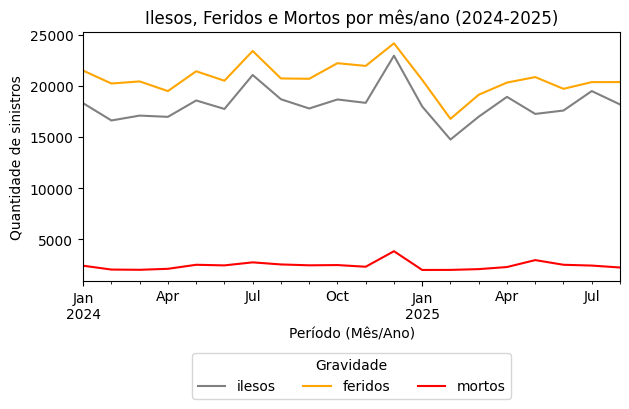

In [13]:
# Cria coluna 'Feridos' somando feridos_leves e feridos_graves
df['feridos'] = df[['feridos_leves', 'feridos_graves']].sum(axis=1, skipna=True)

# Agrupa por mês/ano, conta IDs únicos e soma os feridos/mortos/ilesos para exibir gráfico de linhas temporal
top_mes = df.groupby(df['data_inversa_dt'].dt.to_period("M")).agg({'id': 'nunique', 'feridos': 'sum', 'mortos': 'sum', 'ilesos': 'sum'}).reset_index()
top_mes.columns = ['mes_ano', 'quantidade', 'feridos', 'mortos', 'ilesos']
top_mes.set_index('mes_ano', inplace=True)
top_mes = top_mes.sort_index()

top_mes[['ilesos', 'feridos', 'mortos']].plot(kind='line', color=['gray', 'orange', 'red'])
plt.legend(
    top_mes[['ilesos', 'feridos', 'mortos']],
    title="Gravidade",
    loc="lower center",
    bbox_to_anchor=(0.5, -0.5),
    ncol=len(top_mes.index)
)

plt.title('Ilesos, Feridos e Mortos por mês/ano (2024-2025)')
plt.ylabel('Quantidade de sinistros')
plt.xlabel('Período (Mês/Ano)')
plt.tight_layout()
plt.show()

## Gráficos para visualizar possíveis outliers

### Verificação da Idade (Scatter Plot)

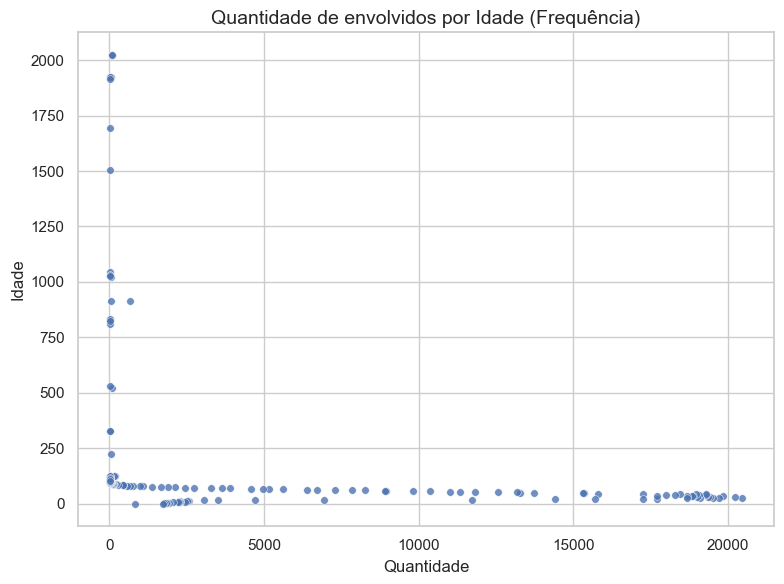

In [14]:
# Altera configuração básica para melhor visualização
sns.set_theme(style="whitegrid")
plt.rcParams['figure.dpi'] = 100

# Converte a coluna para tipo numérico, forçando erros para NaN
df['idade'] = pd.to_numeric(df['idade'], errors='coerce')

# Remove valores nulos (NaN) para o gráfico
df_idade = df.dropna(subset=['idade'])

# Agrupa por idade, conta ocorrências e mostra em gráfico de dispersão
contagem_idade = df_idade['idade'].value_counts()
df_plot_frequencia = contagem_idade.reset_index()
df_plot_frequencia.columns = ['idade', 'quantidade']

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_plot_frequencia,
    x='quantidade',
    y='idade',
    s=30,
    alpha=0.8
)
plt.title('Quantidade de envolvidos por Idade (Frequência)', fontsize=14)
plt.xlabel('Quantidade')
plt.ylabel('Idade')
plt.ticklabel_format(style='plain', axis='x')

plt.tight_layout()
plt.show()

### Gráfico de dispersão da quantidade de envolvidos por Idade, com tratamento de outliers.

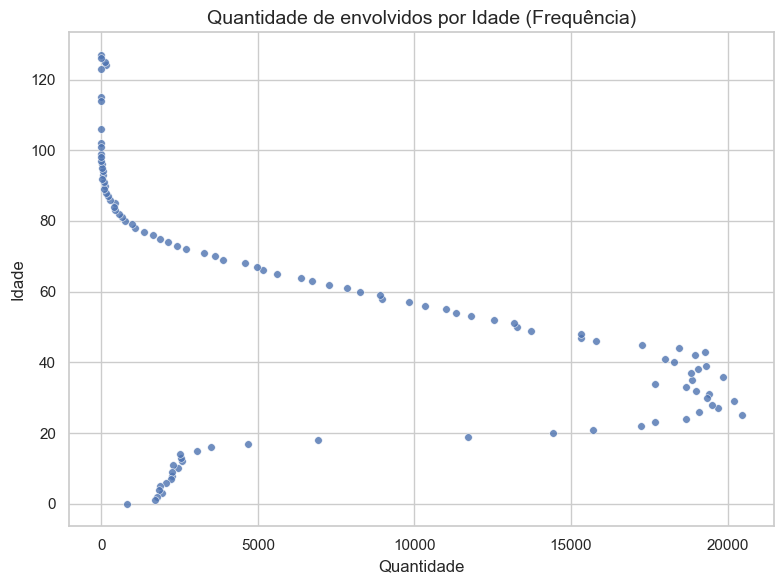

In [15]:
#  Remove outliers baseados no limite superior definido (200 anos)
df_idade_tratado = df_idade[df_idade['idade'] <= 200]

# Agrupa por idade, conta ocorrências e mostra em gráfico de dispersão
contagem_idade = df_idade_tratado['idade'].value_counts()
df_plot_frequencia = contagem_idade.reset_index()
df_plot_frequencia.columns = ['idade', 'quantidade']

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_plot_frequencia,
    x='quantidade',
    y='idade',
    s=30,
    alpha=0.8
)
plt.title('Quantidade de envolvidos por Idade (Frequência)', fontsize=14)
plt.xlabel('Quantidade')
plt.ylabel('Idade')
plt.ticklabel_format(style='plain', axis='x')

plt.tight_layout()
plt.show()

### Verificação do Ano de fabricação (Box Plot)

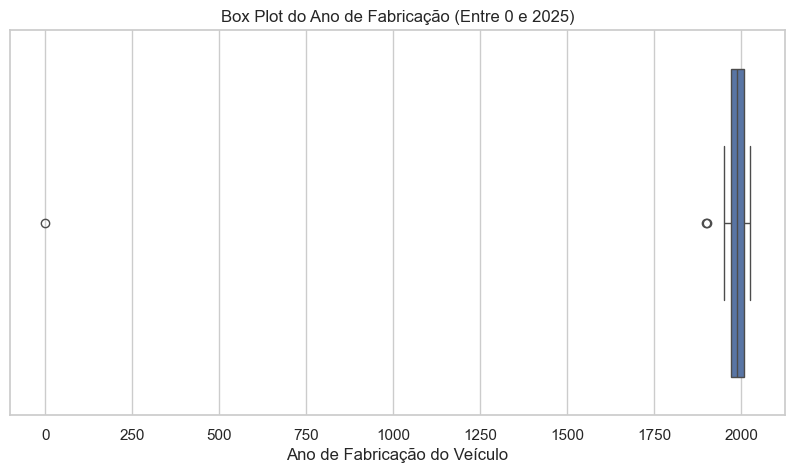

In [16]:
# Converte a coluna para tipo numérico, forçando erros para NaN
df['ano_fabricacao_veiculo'] = pd.to_numeric(df['ano_fabricacao_veiculo'], errors='coerce')

# Remove valores nulos (NaN) para o gráfico
df_ano = df.dropna(subset=['ano_fabricacao_veiculo'])

# Agrupa por Ano de fabricação, conta IDs únicos de veículos e mostra em gráfico de Box
df_veiculos = df_ano.groupby('ano_fabricacao_veiculo')['id_veiculo'].nunique().reset_index()
df_veiculos.columns = ['ano_fabricacao_veiculo', 'quantidade']
df_veiculos.set_index('ano_fabricacao_veiculo', inplace=True)

# Verifica valores mínimos e máximos para o título
ano_min = df_veiculos.index.min()
ano_max = df_veiculos.index.max()

# Criação do Box Plot
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_veiculos.index)
plt.title(f'Box Plot do Ano de Fabricação (Entre {int(ano_min)} e {int(ano_max)})', fontsize=12)
plt.xlabel('Ano de Fabricação do Veículo')
plt.show()

### Box Plot da quantidade de veículos envolvidos por Ano de fabricação, com tratamento de outliers.

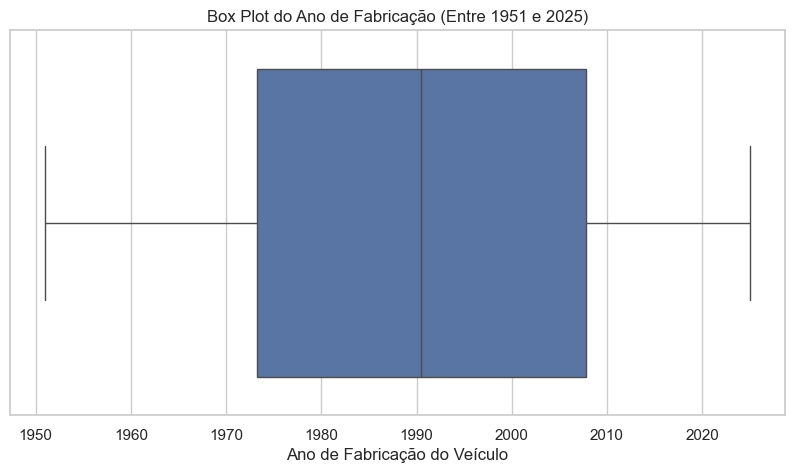

In [17]:
# Converte a coluna para tipo numérico, forçando erros para NaN
df['ano_fabricacao_veiculo'] = pd.to_numeric(df['ano_fabricacao_veiculo'], errors='coerce')

# Remove valores nulos (NaN) para o gráfico
df_ano = df.dropna(subset=['ano_fabricacao_veiculo'])

# Remove outliers baseados nos limites definidos (ano atual e 1886 - ano do primeiro carro)
ano_atual = datetime.now().year
df_ano_tratado = df_ano[(df_ano['ano_fabricacao_veiculo'] <= ano_atual) & (df_ano['ano_fabricacao_veiculo'] >= 1950)]

# Remove outliers baseados na marca (remove "Não Informado/Não Informado", "NA/NA", "NaN" e "Outros")
df_ano_tratado = df_ano_tratado[~df_ano_tratado['marca'].isin(['Não Informado/Não Informado', 'NA/NA', 'NaN', 'Outros'])]
df_ano_tratado = df_ano_tratado[df_ano_tratado['marca'].notna()]

# Agrupa por Ano de fabricação, conta IDs únicos de veículos e mostra em gráfico de Box
df_veiculos = df_ano_tratado.groupby('ano_fabricacao_veiculo')['id_veiculo'].nunique().reset_index()
df_veiculos.columns = ['ano_fabricacao_veiculo', 'quantidade']
df_veiculos.set_index('ano_fabricacao_veiculo', inplace=True)

# Verifica valores mínimos e máximos para o título
ano_atual = datetime.now().year
ano_min = df_veiculos.index.min()
ano_max = df_veiculos.index.max()

# Criação do Box Plot
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_veiculos.index)
plt.title(f'Box Plot do Ano de Fabricação (Entre {int(ano_min)} e {int(ano_max)})', fontsize=12)
plt.xlabel('Ano de Fabricação do Veículo')
plt.show()

### Exibe os outliers do Ano de fabricação

In [18]:
# Converte a coluna para tipo numérico, forçando erros para NaN
df['ano_fabricacao_veiculo'] = pd.to_numeric(df['ano_fabricacao_veiculo'], errors='coerce')

# Remove valores nulos (NaN) para o gráfico
df_ano = df.dropna(subset=['ano_fabricacao_veiculo'])

# Mantem outliers baseados nos limites definidos (ano atual e 1886 - ano do primeiro carro)
ano_atual = datetime.now().year
df_outliers = df_ano[(df_ano['ano_fabricacao_veiculo'] <= 1910) | (df_ano['ano_fabricacao_veiculo'] > ano_atual)]

# Resumir pela marca e quantitativo de veículos
df_outliers = df_outliers.groupby(['marca', 'ano_fabricacao_veiculo']).size().reset_index(name='quantidade')

# Mostra as 5 primeiras linhas do Dataset resultante para ano 0 e para ano acima de 0
df_outliers[df_outliers['ano_fabricacao_veiculo'] == 0].head(5), df_outliers[df_outliers['ano_fabricacao_veiculo'] > 0].head(5)


(                    marca  ano_fabricacao_veiculo  quantidade
 0                 AGRALE/                     0.0          67
 1       AGRALE/MARRUA 4WD                     0.0          13
 2    AGRALE/MARRUA AM 200                     0.0           6
 3  AGRALE/MARRUA AM200 MO                     0.0           3
 4             AUDI/A3 1.8                     0.0           9,
                         marca  ano_fabricacao_veiculo  quantidade
 85        CITROEN/C3 AIRCROSS                  1900.0          12
 323            GM/PRISMA MAXX                  1900.0          12
 434      HONDA/NXR150 BROS ES                  1900.0          12
 505    I/CHACOMER KENTON C110                  1900.0           6
 607  I/JINBEI SHINERAY CARGOV                  1900.0           1)

### Matriz de Co-ocorrência com Heatmap pelo Estado Físico do Envolvido

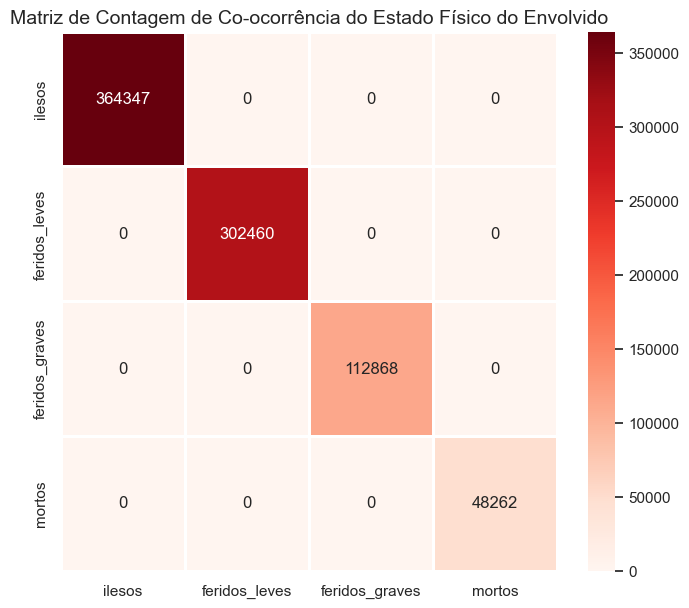

In [19]:
# Seleciona as colunas binárias para a análise de co-ocorrência
colunas_binarias = ['ilesos', 'feridos_leves', 'feridos_graves', 'mortos']
for col in colunas_binarias:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Remove linhas com valores nulos nas colunas binárias
df_corr = df[colunas_binarias].dropna().copy()

# Inicializa a matriz de co-ocorrência com as colunas binárias
matriz_coocorrencia = pd.DataFrame(index=colunas_binarias, columns=colunas_binarias)

# Conta quantos registros têm 1 em ambas as colunas (verificar possível inconsistência)
for i in colunas_binarias:
    for j in colunas_binarias:
        matriz_coocorrencia.loc[i, j] = (df_corr[i] * df_corr[j]).sum()

# Converte para float para o heatmap
matriz_coocorrencia = matriz_coocorrencia.astype(float)

# Criação do Heatmap
plt.figure(figsize=(8, 7))
sns.heatmap(
    matriz_coocorrencia,
    annot=True,
    fmt=".0f",
    cmap="Reds",
    linewidths=1,
)

plt.title('Matriz de Contagem de Co-ocorrência do Estado Físico do Envolvido', fontsize=14)
plt.show()

### Verificação Geográfica dos Sinistros (Scatter Plot)

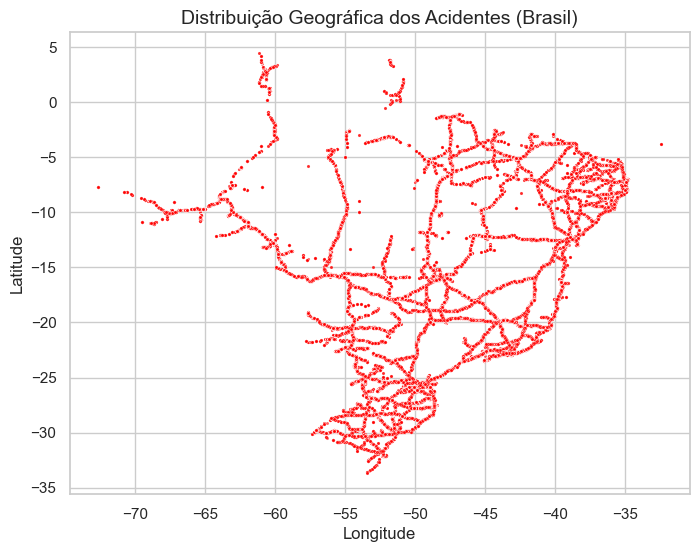

In [20]:
# Converte as coordenadas para tipo numérico, forçando erros para NaN
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')

# Remove valores nulos (NaN) para o gráfico
df_geo = df.dropna(subset=['latitude', 'longitude']).copy()

# Delimitador geográfico do Brasil
LAT_MIN, LAT_MAX = -33.75, 5.3
LON_MIN, LON_MAX = -74, -32.36

# Filtra o Brasil
df_brasil = df_geo[
    (df_geo['latitude'] >= LAT_MIN) & (df_geo['latitude'] <= LAT_MAX) &
    (df_geo['longitude'] >= LON_MIN) & (df_geo['longitude'] <= LON_MAX)
]

# Criação do Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_brasil['longitude'],
    y=df_brasil['latitude'],
    s=5, # Tamanho do ponto
    alpha=0.6,
    color='red'
)
plt.title('Distribuição Geográfica dos Acidentes (Brasil)', fontsize=14)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

### Exibição de possíveis outliers geográficos

In [21]:
# Converte as coordenadas para tipo numérico, forçando erros para NaN
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')

# Remove valores nulos (NaN) para o gráfico
df_geo = df.dropna(subset=['latitude', 'longitude']).copy()

# Delimitador geográfico do Brasil
LAT_MIN, LAT_MAX = -33.75, 5.3
LON_MIN, LON_MAX = -74, -32.36

# Identificando outliers geográficos extremos (fora do Brasil)
outliers_geo = df_geo[
    ((df_geo['latitude'] < LAT_MIN) & (df_geo['latitude'] > LAT_MAX) &
      (df_geo['longitude'] < LON_MIN) & (df_geo['longitude'] > LON_MAX))
]

if not outliers_geo.empty:
    print(f"\nNúmero de registros com coordenadas fora da área definida (Outliers Geográficos): {len(outliers_geo)}")
    print(f"Exemplo de Lat/Lon Outlier:\n{outliers_geo[['latitude', 'longitude']].head(10)}")
else:
    print("\nNenhum outlier geográfico encontrado fora da área definida.")


Nenhum outlier geográfico encontrado fora da área definida.
